 # Instructor Do: Portfolio Optimization

In [20]:
# Initial imports
import ffn
import pypfopt

from pypfopt import plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
%matplotlib inline

In [22]:
# Get list of closing prices for each stock using the ffn library
prices = ffn.get('moat, iyw, voo, fxi, vgt, wmt, aapl, fb, amzn, tsla', start='2017-01-01')
prices.head()

,moat,iyw,voo,fxi,vgt,wmt,aapl,fb,amzn,tsla
Date,,,,,,,,,,
2017-01-03,33.889214,117.450027,194.064209,32.273781,117.764610,63.187412,110.392334,116.860001,753.669983,216.990005
2017-01-04,34.234631,117.973526,195.209412,32.604321,118.476250,63.555534,110.268791,118.690002,757.179993,226.990005
2017-01-05,34.225029,118.157722,195.059235,33.072590,118.562805,63.693573,110.829552,120.669998,780.450012,226.750000
2017-01-06,34.416931,119.282288,195.819550,32.824680,119.649467,62.819294,112.065109,123.410004,795.989990,229.009995
2017-01-09,34.359360,119.621605,195.200012,32.870594,119.861031,63.233440,113.091560,124.900002,796.919983,231.279999


In [23]:
# Calculate expected returns and sample covariance
mean_return = pypfopt.expected_returns.mean_historical_return(prices)
mean_return

moat    0.153365
iyw     0.268840
voo     0.135113
fxi     0.090813
vgt     0.277525
wmt     0.207306
aapl    0.381902
fb      0.259068
amzn    0.408675
tsla    0.614170
dtype: float64

In [24]:
# Produce a covariance matrix
sample_cov = pypfopt.risk_models.sample_cov(prices)
sample_cov

,moat,iyw,voo,fxi,vgt,wmt,aapl,fb,amzn,tsla
moat,0.043105,0.046216,0.042086,0.032989,0.046754,0.022491,0.045970,0.040935,0.034315,0.049219
iyw,0.046216,0.065293,0.049999,0.042502,0.064433,0.026533,0.067956,0.063443,0.055543,0.067216
voo,0.042086,0.049999,0.044007,0.034901,0.050329,0.024419,0.050709,0.045219,0.038513,0.051203
fxi,0.032989,0.042502,0.034901,0.053208,0.042342,0.018928,0.042670,0.039540,0.036316,0.045840
vgt,0.046754,0.064433,0.050329,0.042342,0.064472,0.026635,0.067252,0.059655,0.053383,0.066911
wmt,0.022491,0.026533,0.024419,0.018928,0.026635,0.053235,0.027517,0.020033,0.022423,0.019322
aapl,0.045970,0.067956,0.050709,0.042670,0.067252,0.027517,0.091881,0.061103,0.056565,0.069374
fb,0.040935,0.063443,0.045219,0.039540,0.059655,0.020033,0.061103,0.109199,0.060363,0.063941
amzn,0.034315,0.055543,0.038513,0.036316,0.053383,0.022423,0.056565,0.060363,0.087962,0.061442
tsla,0.049219,0.067216,0.051203,0.045840,0.066911,0.019322,0.069374,0.063941,0.061442,0.341923


In [25]:
# Optimise for maximal Sharpe ratio
ef = pypfopt.EfficientFrontier(mean_return, sample_cov)
raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.csv")  # saves to file
ef.portfolio_performance(verbose=True)

cleaned_weights

Expected annual return: 38.7%
Annual volatility: 24.3%
Sharpe Ratio: 1.51


OrderedDict([('moat', 0.0),
             ('iyw', 0.0),
             ('voo', 0.0),
             ('fxi', 0.0),
             ('vgt', 0.0),
             ('wmt', 0.23566),
             ('aapl', 0.18736),
             ('fb', 0.0),
             ('amzn', 0.42477),
             ('tsla', 0.15221)])

In [26]:
# Get discrete allocations
latest_prices = get_latest_prices(prices)

portfolio_amount = 100000

da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=portfolio_amount)
allocation, leftover = da.lp_portfolio()

print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'wmt': 199.0, 'aapl': 54.0, 'amzn': 16.0, 'tsla': 15.0}
Funds remaining: $3.49


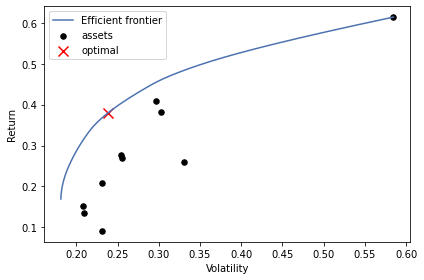

In [29]:
cla = pypfopt.cla.CLA(expected_returns=mean_return, cov_matrix=sample_cov)
plotting.plot_efficient_frontier(cla, points=1000)